### 1/ Tạo 1 dataset gồm 10 điểm dữ liệu sinh từ hàm y=x^2+noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Thử thêm 100 điểm dữ liệu nữa xem hàm đa thức bậc 9 sẽ như thế nào?

In [ ]:
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

data_X = [randint(1,20) for x in range(1,11)]
data_X = np.array(data_X)
data_Y = data_X**2 + randint(50)

import numpy as np

X_seq = np.linspace(X.min(),X.max(),10).reshape(-1, 1)
X_seq.shape

(10, 1)

In [ ]:
data_X = data_X.reshape(-1, 1)
data_Y = data_Y.reshape(-1, 1)

degree=9

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(data_X, data_Y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

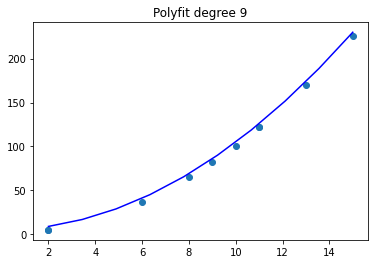

In [ ]:
# plt.figure()
# plt.scatter(data_X,data_Y)
# plt.plot(data_X,polyreg.predict(data_X),color="black")
# plt.title("Polynomial regression with degree "+str(degree))
# plt.show()

plt.figure()
plt.plot(X_seq,polyreg.predict(X_seq),color="blue")
plt.title("Polyfit degree "+str(degree))
plt.scatter(X,y)
plt.show()

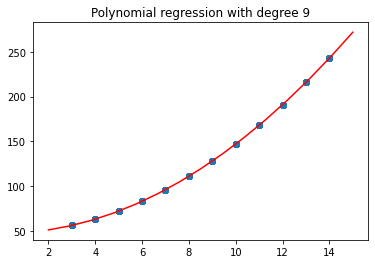

[[12]
 [13]
 [11]
 [ 5]
 [ 6]
 [11]
 [ 8]
 [ 5]
 [ 6]
 [12]]


In [ ]:
# Cach lam thu cong
# num1 = np.ones((10, 1)).reshape(-1,1)

# data_X = data_X.reshape(-1, 1)
# data_X = np.stack([num1, data_X, data_X**2, data_X**3, data_X**4, data_X**5, \
#                    data_X**6, data_X**7, data_X**8, data_X**9], axis=-1)

# data_X = data_X.reshape(data_X.shape[0], data_X.shape[-1])

# data_Y = data_Y.reshape(-1,1)

# from sklearn.preprocessing import MinMaxScaler
# # fit
# scaler_X = MinMaxScaler().fit(data_X)
# scaler_Y = MinMaxScaler().fit(data_Y)
# # transform data
# scaled_X = scaler_X.transform(data_X)
# scaled_Y = scaler_Y.transform(data_Y)

# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(scaled_X, scaled_Y)

# a = []
# b = []
# for i in range(1,50,2):
#     j = reg.coef_[0][0] * i + reg.coef_[0][1] * i * i + reg.intercept_
#     a.append(i)
#     b.append(j)

# plt.scatter(a, b, c='r')

# x = data_X[:, 1].reshape(-1, 1)
# y = data_Y[:, 0].reshape(-1, 1)
# plt.scatter(x, y, c='b')


# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# Cach lam import library

data_X = [randint(3,15) for x in range(1,101)]
data_X = np.array(data_X)
data_Y = data_X**2 + randint(100)

X_seq = np.linspace(X.min(),X.max(),15).reshape(-1, 1)
X_seq.shape

data_X = data_X.reshape(-1, 1)
data_Y = data_Y.reshape(-1, 1)

degree=9

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(data_X, data_Y)

plt.figure()
plt.scatter(data_X,data_Y)
plt.plot(X_seq,polyreg.predict(X_seq),color="red")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()
print(data_X[:10]) ## rat nhieu gia tri bi trung lap

### Cau 2: Implement hàm tính convolution, input X, W, stride, padding, output Y. Implement hàm sobel

<img src="https://cdn.discordapp.com/attachments/506487127467622400/857836293449842708/bai2.jpg">

### Cau 3: Hiểu code mẫu, chỉnh hyper như lr, optimizer, kernel size, số kernel,.... So sánh các kết quả.


In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
print(X_val.shape)

11501568/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)


In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.
print(X_train.shape)

(50000, 28, 28, 1)


In [ ]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# BatchNormalization()
# Init Weight ()

# 5. Định nghĩa model
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# Thêm Max pooling layer
model.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 703,210
Trainable params: 703,210
Non-trainable params: 0
__________________________________________________

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 127s 71ms/step - loss: 0.2819 - accuracy: 0.9138 - val_loss: 0.0565 - val_accuracy: 0.9836
Epoch 2/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.0395 - accuracy: 0.9884 - val_loss: 0.0462 - val_accuracy: 0.9865
Epoch 3/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 4/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.0529 - val_accuracy: 0.9870
Epoch 5/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0494 - val_accuracy: 0.9893
Epoch 6/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0507 - val_accuracy: 0.9887
Epoch 7/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0

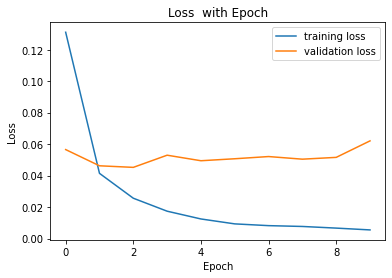

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss  with Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

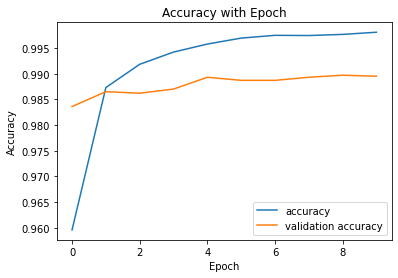

In [ ]:
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy with Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.050406575202941895, 0.9894999861717224]


Giá trị dự đoán:  7


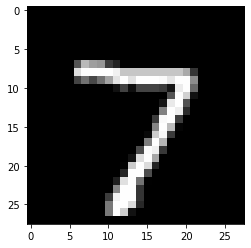

In [ ]:
# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

## Change the architecture:

In [ ]:
# Change the architecture:

#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
print(X_val.shape)

#Reshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.

# one hot
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

11501568/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)
Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))

model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(256, activation='gelu'))

model.add(Dense(128, activation='gelu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=64, epochs=16, verbose=1)

Epoch 1/16
782/782 [==============================] - 47s 5ms/step - loss: 2.1841 - accuracy: 0.2864 - val_loss: 0.3854 - val_accuracy: 0.8825
Epoch 2/16
782/782 [==============================] - 3s 4ms/step - loss: 0.3407 - accuracy: 0.8928 - val_loss: 0.1721 - val_accuracy: 0.9505
Epoch 3/16
782/782 [==============================] - 3s 4ms/step - loss: 0.1843 - accuracy: 0.9426 - val_loss: 0.6966 - val_accuracy: 0.7611
Epoch 4/16
782/782 [==============================] - 4s 5ms/step - loss: 0.1416 - accuracy: 0.9560 - val_loss: 0.1627 - val_accuracy: 0.9464
Epoch 5/16
782/782 [==============================] - 4s 5ms/step - loss: 0.0978 - accuracy: 0.9698 - val_loss: 0.1206 - val_accuracy: 0.9642
Epoch 6/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0801 - accuracy: 0.9749 - val_loss: 0.0731 - val_accuracy: 0.9772
Epoch 7/16
782/782 [==============================] - 4s 5ms/step - loss: 0.0667 - accuracy: 0.9795 - val_loss: 0.0644 - val_accuracy: 0.9813
Epoch

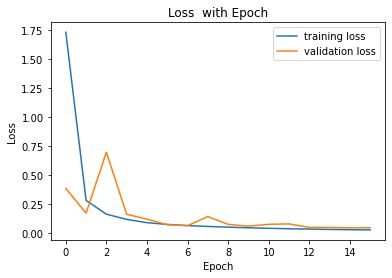

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 16
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss  with Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

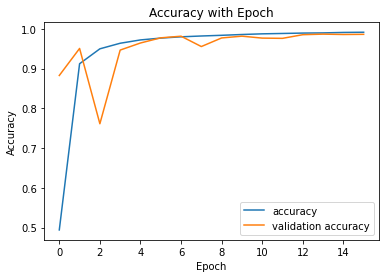

In [ ]:
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy with Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Cau 4: Build model tương tự VGG16 (có thể nông hơn) cho cifar10.

In [ ]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print(X_train.shape)
X_val, y_val = X_train[40000:50000,:], y_train[40000:50000]
X_train, y_train = X_train[:40000,:], y_train[:40000]
print(X_train.shape, X_val.shape)

(50000, 32, 32, 3)
(40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.
print(X_train.shape)

(40000, 32, 32, 3)


In [ ]:
#one hot for Y data

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  [6]
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# design architecture
model = Sequential()

# init
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# D F F: 128*3*3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.2))
model.add(MaxPooling2D())

# 256 * 3 * 3
model.add(Conv2D(256, (3, 3), strides=(2,2), padding='same', activation='relu'))
model.add(Dropout(0.1))
# model.add(MaxPooling2D())

# 512 * 3 * 3
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dense(512, activation='relu'))

model.add(Dense(32, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.00071)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
numOfEpoch = 150
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=numOfEpoch, verbose=1)

Epoch 1/150
1250/1250 [==============================] - 15s 11ms/step - loss: 2.3023 - accuracy: 0.1103 - val_loss: 2.3005 - val_accuracy: 0.1673
Epoch 2/150
1250/1250 [==============================] - 14s 11ms/step - loss: 2.3006 - accuracy: 0.1399 - val_loss: 2.2984 - val_accuracy: 0.1989
Epoch 3/150
1250/1250 [==============================] - 14s 11ms/step - loss: 2.2987 - accuracy: 0.1667 - val_loss: 2.2958 - val_accuracy: 0.2030
Epoch 4/150
1250/1250 [==============================] - 13s 11ms/step - loss: 2.2957 - accuracy: 0.1850 - val_loss: 2.2916 - val_accuracy: 0.2050
Epoch 5/150
1250/1250 [==============================] - 13s 11ms/step - loss: 2.2913 - accuracy: 0.1924 - val_loss: 2.2847 - val_accuracy: 0.2018
Epoch 6/150
1250/1250 [==============================] - 13s 11ms/step - loss: 2.2832 - accuracy: 0.1974 - val_loss: 2.2715 - val_accuracy: 0.1986
Epoch 7/150
1250/1250 [==============================] - 13s 11ms/step - loss: 2.2678 - accuracy: 0.1998 - val_loss: 2

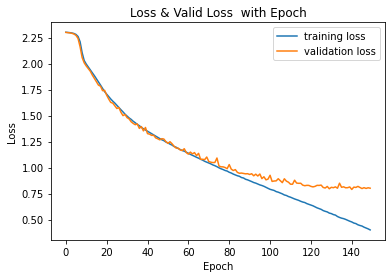

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()

plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss & Valid Loss  with Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

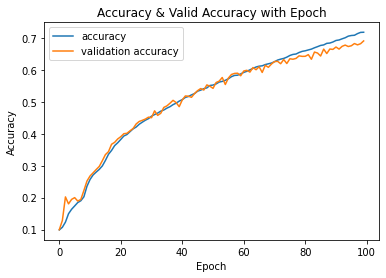

In [ ]:
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy & Valid Accuracy with Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Cau 5: Tại sao khi build model, càng sâu thì width, height giảm nhưng depth tăng.

Ban đầu W, H lớn và Kernel nhỏ để dễ dàng detect được line và edge. Sau khi capture được edge/ line, ta cần capture thuộng tính của ảnh. Do feature của ảnh có pixel lớn, nên có 2 hướng:
* Hướng thứ nhất là tăng kích thước kernel, đồng nghĩa với việc tăng parameter của layer làm cho tổng parameter của layers tăng và khối lượng tính toán đồ sộ.
* Hướng thứ 2 là giảm pixel của W & H để giảm khối lượng tính toán (không cần thay kernel size) đồng thời dễ dàng capture được các thuộc tính lớn/ thuộc tính quan trọng của ảnh.
* Theo tính toán thì depth của kernel = depth của output. Do t
ăng depth của kernel ở những layer sau nên depth output cũng tăng. 1 ảnh màu có 3 channel RGB, tăng depth của kernel sẽ làm tăng độ sâu tương ứng với các kênh màu khác nhau của ảnh màu, 3 channel ảnh có thể được quy định theo lý thuyết, nhưng thực tế các màu này là tổ hợp các màu từ 0 - 255 nên có thể được coi là các channel riêng, việc tăng cường các channel riêng thì sẽ dễ nắm bắt các thuộc tính ảnh và cho độ chính xác cao hơn.  